# Project 2 - Classification
## Predict customers likely to respond to a marketing campaign



## Group J

Diana dos Santos Rodrigues 20240110

Laura Luís Esteves Patrocínio Tomás 20240116

Matilde Pica Ferreira da Costa 20240115


This notebook uses the *campaign.xlsx* dataset

Professor: 
(c) Nuno António 2022 - Rev. 1.0

Professor from Practical classes: Ana Edmundo

We are consultants for a retail company. Our goal for this project is to develop a prediction model for the Marketing Department of this company, to predict which customers are likely to respond to a marketing campaing based on information from a previous campaign. 
Throughout the notebook, we will be testing three different models, comparing their performance, and selecting the most suitable one for this case. The code used is adapted from materials provided in the Machine Learning class.

## Dataset description

- **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
- **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
- **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
- **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
- **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
- **Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise 
- **Complain** - 1 if customer complained in the last 2 years
- **DtCustomer** - date of customer’s enrolment with the company
- **Education** - customer’s level of education
- **Marital** - customer’s marital status
- **Kidhome** - number of small children in customer’s household
- **Teenhome** - number of teenagers in customer’s household
- **Income** - customer’s yearly household income
- **MntFishProducts** - amount spent on fish products in the last 2 years
- **MntMeatProducts** - amount spent on meat products in the last 2 years
- **MntFruits** - amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - amount spent on wine products in the last 2 years
- **MntGoldProds** - amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalogue
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through company’s web site
- **NumWebVisitsMonth** - number of visits to company’s web site in the last month
- **Recency** - number of days since the last purchase

## Initializations and data loading

In [ ]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import category_encoders as ce
import collections

from datetime import datetime
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

## Data Undertanding

As part of our role as consultants, the first step in developing a predictive response model involves a thorough understanding of the available customer data. This requires importing and exploring the dataset to gain insights into the variables.

The dataset contains demographic information, purchasing behavior, and responses to previous marketing campaigns. By conducting an initial descriptive analysis, we aim to identify potential data quality issues, understand variable distributions, and establish a solid foundation for the subsequent preprocessing and modeling phases.

The code below loads the dataset and generates a statistical summary of all features:

In [ ]:
ds = pd.read_excel('campaign.xlsx', engine='openpyxl')
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,665,2012-08-31,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2237.0,NaN,NaN,NaN,303.838623,336.576209,0.0,24.0,173.0,504.0,1493.0


The analyzed dataset contains 2240 rows:

- `Year_Birth`: The average year of birth is 1969, with values ranging from 1893 to 1996.
- `Education`: Includes 5 distinct levels, with "Graduation" being the most common, representing 1127 records.
- `Marital_Status`: Includes 8 categories, with "Married" as the most frequent, appearing 864 times.
- `Income`: The average income is 52247, with a minimum of 1730 and a maximum of 666666, suggesting the presence of potential outliers.
- `Kidhome` and `Teenhome`: The majority of customers have 0 and/or 1 child.
- `Recency`: The average number of days since the last purchase is 49.
- `MntFishProducts`: Contains a negative minimum value, which may indicate an error.
- `MntSweetProducts`: Has an unusually high maximum value of 2432344, suggesting a data anomaly or extreme outlier.
- Purchase Channels: customers show a preference for purchases made directly in stores, as `NumStorePurchases` has the highest average (5.8) compared to other purchasing channels.
- Campaign Response: Overall, campaign acceptance rates were low. The `Response` variable, representing the latest campaign, showed the best performance, with 15% positive responses, which is still relatively inefficient.
- `Complain`: Fewer than 1% of customers have filed a complaint in the last two years.
- `Z_CostContact` and `Z_Revenue`: These are constant variables, with values of 3 and 11, respectively, for all customers, and therefore carry no variability for analysis.

During data exploration, it was found that `Z_CostContact` and `Z_Revenue` had constant values (3.0 and 11.0) across all rows.  Upon this we decided to delete these collumns, since they do not have any meaning.

In [ ]:
ds.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [ ]:
ds.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520.0,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235.0,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76.0,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14.0,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28.0,...,0,0,20,1,0,0,0,0,0,0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2237 non-null   float64
 10  MntFruits            2238 non-null   float64
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2187 non-null   float64
 15  NumDealsPurchases    2240 non-null   i

`Education` and `Marical_Status` are the only categorical variables.

Check counts of categorical variables:

In [ ]:
cols = ['Education', 'Marital_Status']
ds[cols].apply(pd.Series.value_counts)

,Education,Marital_Status
2n Cycle,203.0,NaN
Absurd,NaN,2.0
Alone,NaN,3.0
Basic,54.0,NaN
Divorced,NaN,232.0
Graduation,1127.0,NaN
Married,NaN,864.0
Master,370.0,NaN
PhD,486.0,NaN
Single,NaN,480.0


Convert `Id` to categorical and check for duplicates:

In [ ]:
ds['ID'] = ds['ID'].astype('category')
ds.ID.describe()

count     2240
unique    2240
top          0
freq         1
Name: ID, dtype: int64

An analysis of the `ID` column confirmed that all 2240 values are unique, meaning there aren't duplicate.

Analyze missing values:

In [ ]:
print(ds.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                3
MntFruits               2
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds           53
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


We have missing values in four variables: `Income`, `MntWines`, `MntFruits`, and `MntGoldProds`. These represent about 4% of the dataset, so we chose to impute the missing values. For `Income`, we filled in the missing values using the median income within each `Education` group.

In [ ]:
ds['Income'] = ds.groupby('Education')['Income'].transform(
    lambda x: x.fillna(x.median())
)

For the variables `MntWines`, `MntFruits`, and `MntGoldProds`, we imputed with zero, assuming that missing values indicate the person didn't spend money on those products.

In [ ]:
cols_to_impute = ['MntWines', 'MntFruits', 'MntGoldProds']
ds[cols_to_impute] = ds[cols_to_impute].fillna(0)

In [ ]:
print(ds.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64


Next, we calculate the number of days since the customer's enrollment date until the current date.

In [ ]:
ds['Dt_Customer'] = pd.to_datetime(ds['Dt_Customer'])

ds = ds[(ds['Dt_Customer'].dt.year >= 2012) & (ds['Dt_Customer'].dt.year <= 2014)] #During the exploratory data analysis, we identified that the Dt_Customer column contained values outside the expected temporal range (2012, 2013, and 2014), such as 2041 and 2042. Therefore, we decided to restrict the dates to the period from 2012 to 2014.

ds['Days_Since_Customer'] = (datetime.today() - ds['Dt_Customer']).dt.days

print(ds[['Dt_Customer', 'Days_Since_Customer']].head(15))
ds.drop(['Dt_Customer'], axis=1, inplace=True)

   Dt_Customer  Days_Since_Customer
0   2012-09-04                 4639
1   2014-03-08                 4089
2   2013-08-21                 4288
3   2014-02-10                 4115
4   2014-01-19                 4137
5   2013-09-09                 4269
6   2012-11-13                 4569
7   2013-05-08                 4393
8   2013-06-06                 4364
9   2014-03-13                 4084
10  2013-11-15                 4202
11  2012-11-13                 4569
12  2013-11-15                 4202
13  2013-11-15                 4202
14  2012-10-10                 4603


And, we transform the customers' birth year into their current age:

In [ ]:
ds['Age'] = 2025 - ds['Year_Birth']

print(ds[['Year_Birth', 'Age']].head(15))
ds.drop(['Year_Birth'], axis=1, inplace=True)

    Year_Birth  Age
0         1957   68
1         1954   71
2         1965   60
3         1984   41
4         1981   44
5         1967   58
6         1971   54
7         1985   40
8         1974   51
9         1950   75
10        1983   42
11        1976   49
12        1959   66
13        1952   73
14        1987   38


In [ ]:
table1 = pd.crosstab(index=ds['Marital_Status'], columns=ds['Education'])
table1

Education,2n Cycle,Basic,Graduation,Master,PhD
Marital_Status,,,,,
Absurd,0,0,1,1,0
Alone,0,0,1,1,1
Divorced,23,1,118,37,52
Married,80,20,433,138,192
Single,37,18,252,75,98
Together,57,14,286,106,117
Widow,5,1,35,12,24
YOLO,0,0,0,0,2


Subsequently, we removed the rows where `Marital_Status` was 'Absurd' and replaced the values 'Alone' and YOLO' in `Marital_Status` with 'Single'.

In [ ]:
ds = ds[~ds['Marital_Status'].isin(['Absurd'])]

ds['Marital_Status'] = ds['Marital_Status'].replace({'Alone': 'Single', 'YOLO': 'Single'})

table1 = pd.crosstab(index=ds['Marital_Status'], columns=ds['Education'])
print(table1)

Education       2n Cycle  Basic  Graduation  Master  PhD
Marital_Status                                          
Divorced              23      1         118      37   52
Married               80     20         433     138  192
Single                37     18         253      76  101
Together              57     14         286     106  117
Widow                  5      1          35      12   24


Analyze numerical variables through histograms:

array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>,
        <Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>],
       [<Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>],
       [<Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>],
       [<Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4'}>,
        <Axes: title={'center': 'AcceptedCmp5'}>,
        <Axes: title={'center': 'AcceptedCmp1'}>,
        <Axes: title={'center': 'Accept

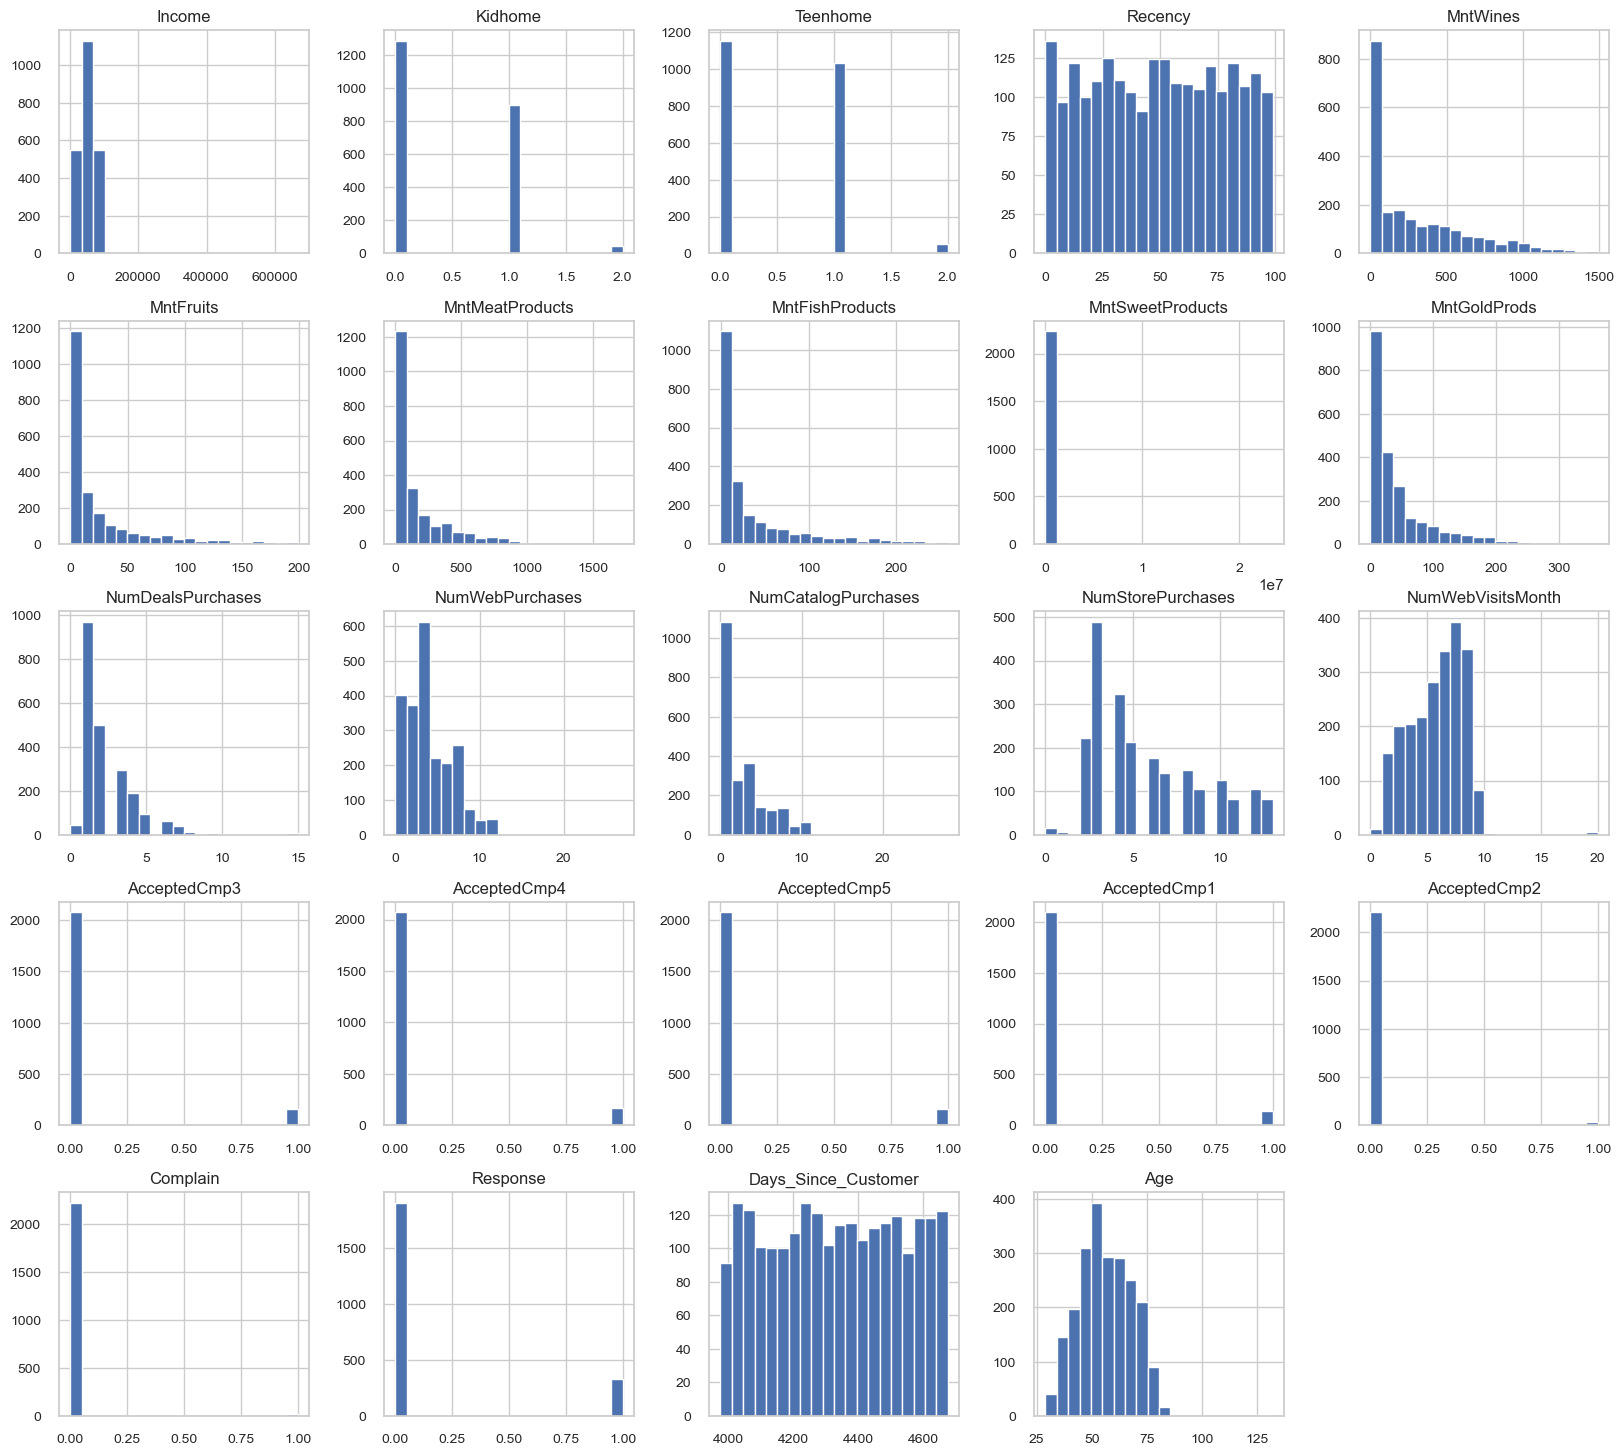

In [ ]:
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
ds[numerical].hist(bins=20, figsize=(20, 18), xlabelsize=10, ylabelsize=10)

Analyze numerical variables through boxplots:

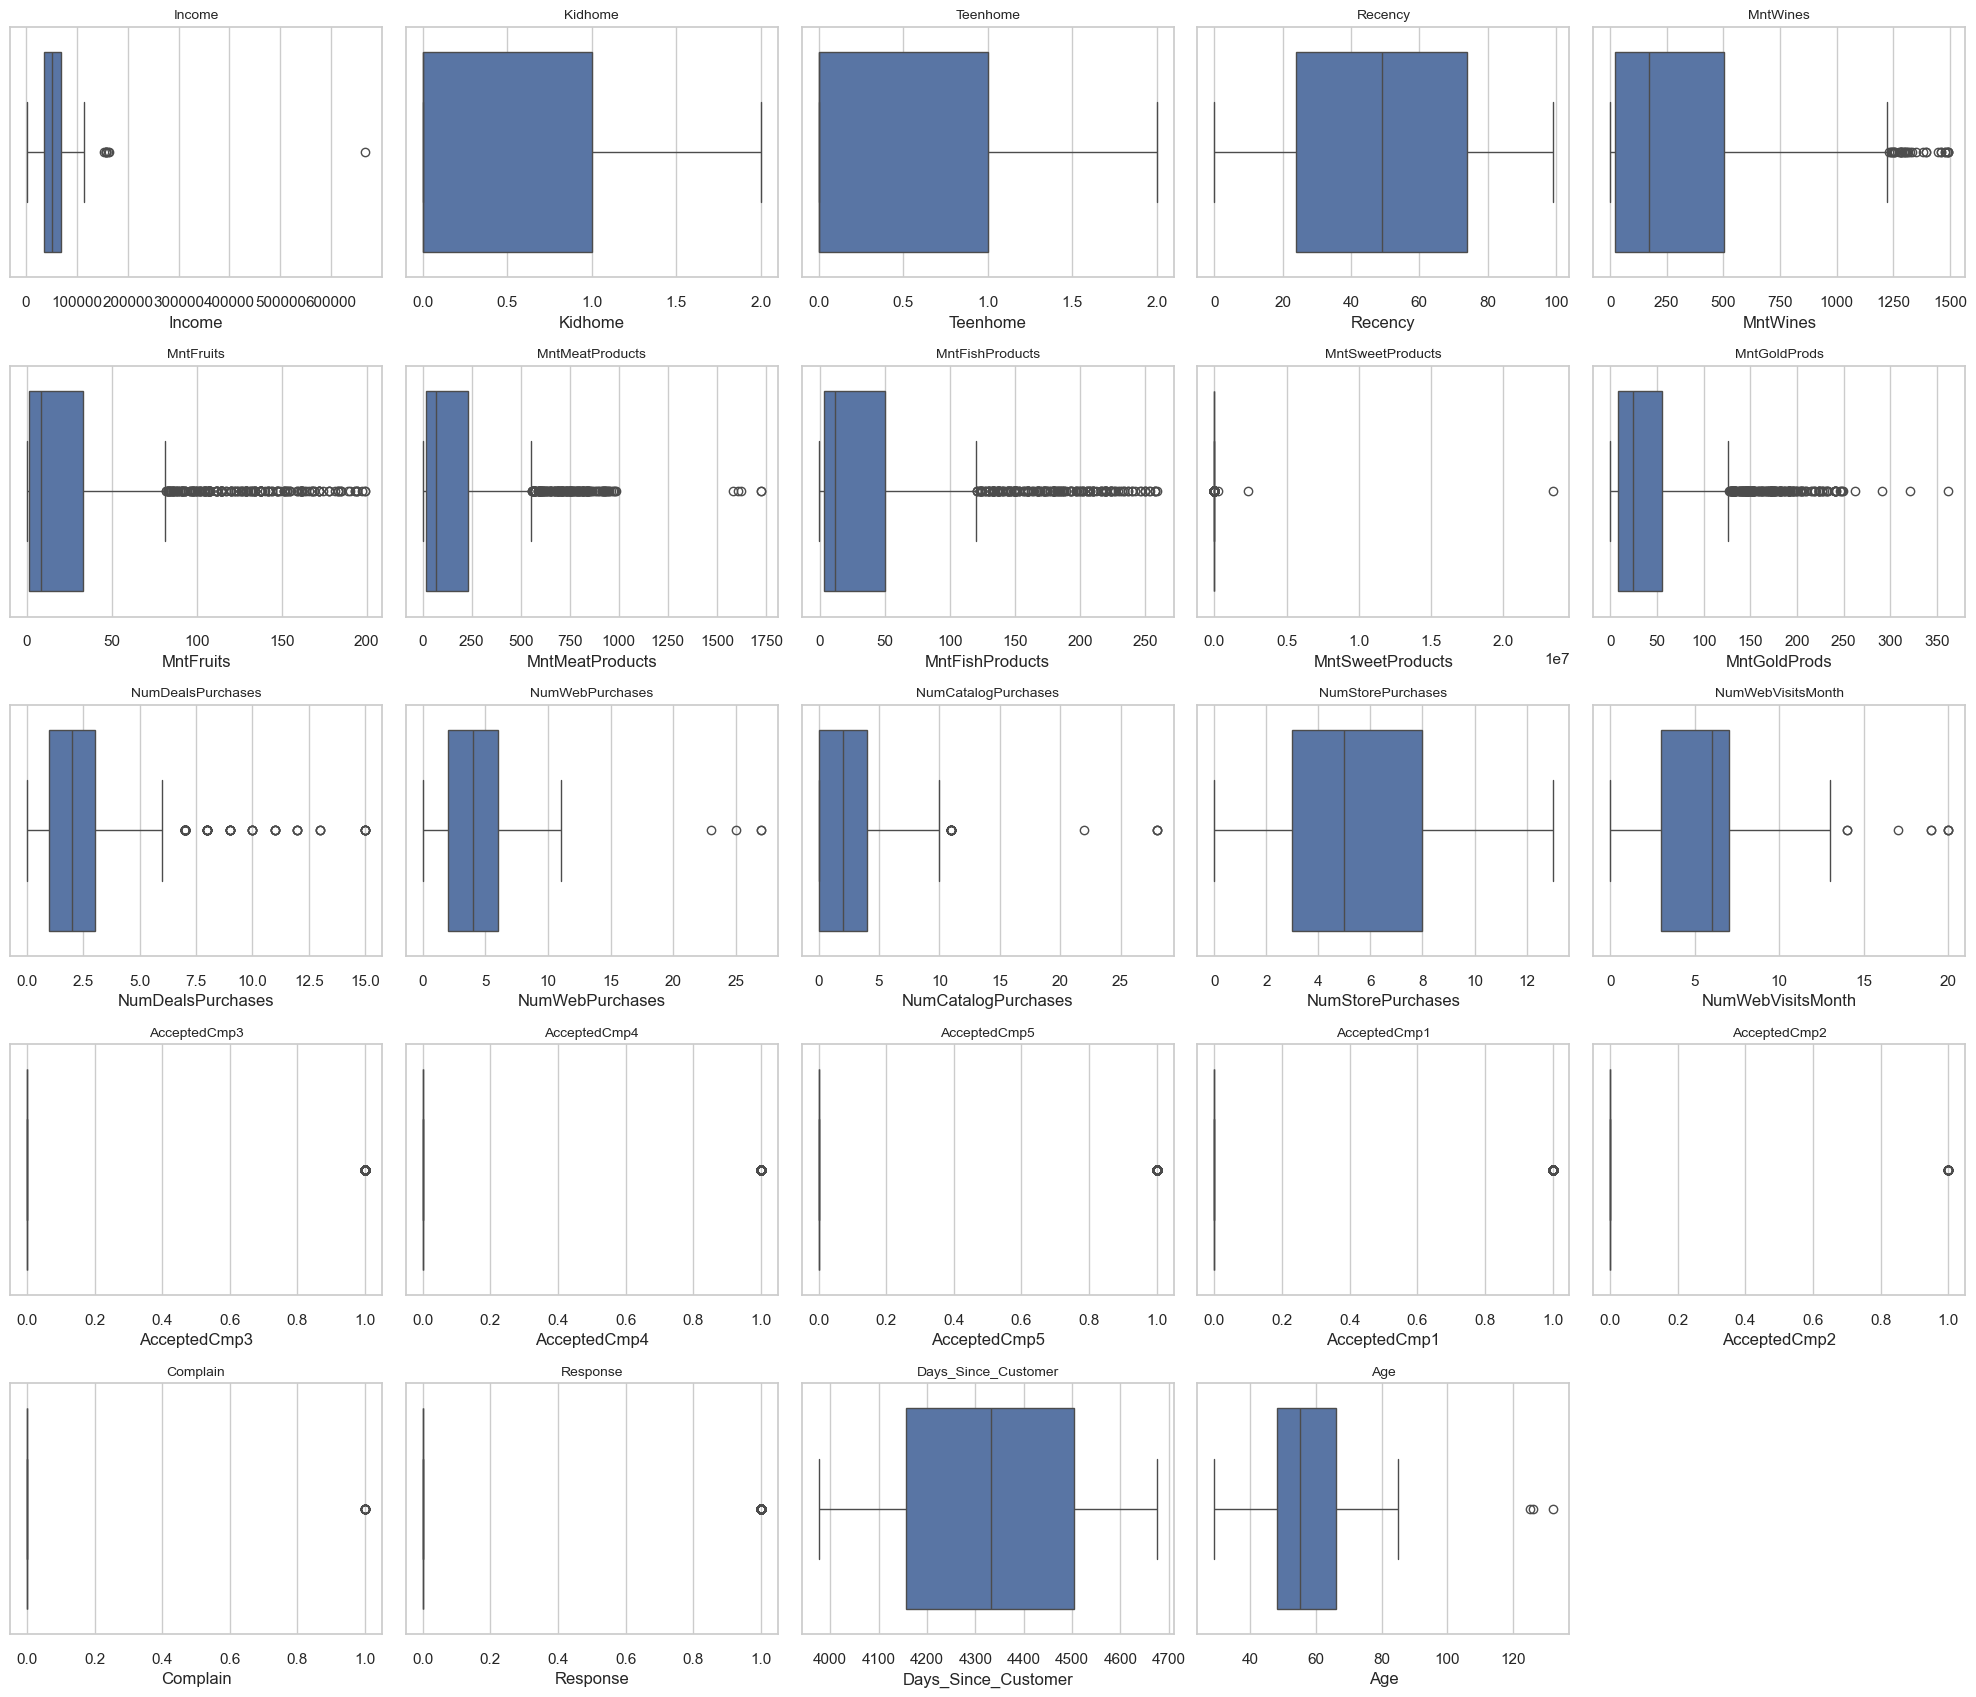

In [ ]:
fig, ax = plt.subplots(6, 5, figsize=(20, 20))  
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)
    subplot.set_title(var, fontsize=10)

for i in range(len(numerical), len(ax.flatten())):
    fig.delaxes(ax.flatten()[i])

plt.tight_layout()
plt.show()


By analyzing the boxplots and the dataset, we identified that the variables `Age`, `Income`, `MntMeatProducts`, and `MntSweetProducts` have values that are significantly distant from most of the data. These extreme or unrealistic values indicate the presence of outliers, which may distort the analysis and will therefore be addressed later.

Checking for highly correlated binary variables:

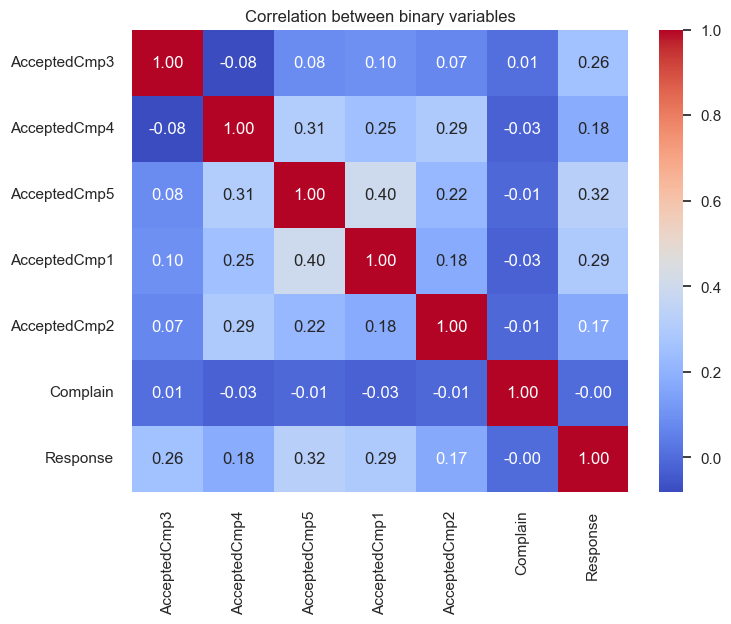

In [ ]:
binary_cols = [col for col in ds.columns if ds[col].dropna().isin([0,1]).all()]
df_bin = ds[binary_cols]

correlation_matrix = df_bin.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between binary variables")
plt.show()

The chart shows that there aren't strong correlations between the binary variables analyzed. Most of the correlation coefficients are close to zero, indicating that the variables are largely independent of each other. The highest correlations were between `AcceptedCmp1` and `AcceptedCmp5` (0.40), and between `AcceptedCmp5` and `Response` (0.32), although these values remain quite low.

Plot correlation heatmap of all numeric variables:

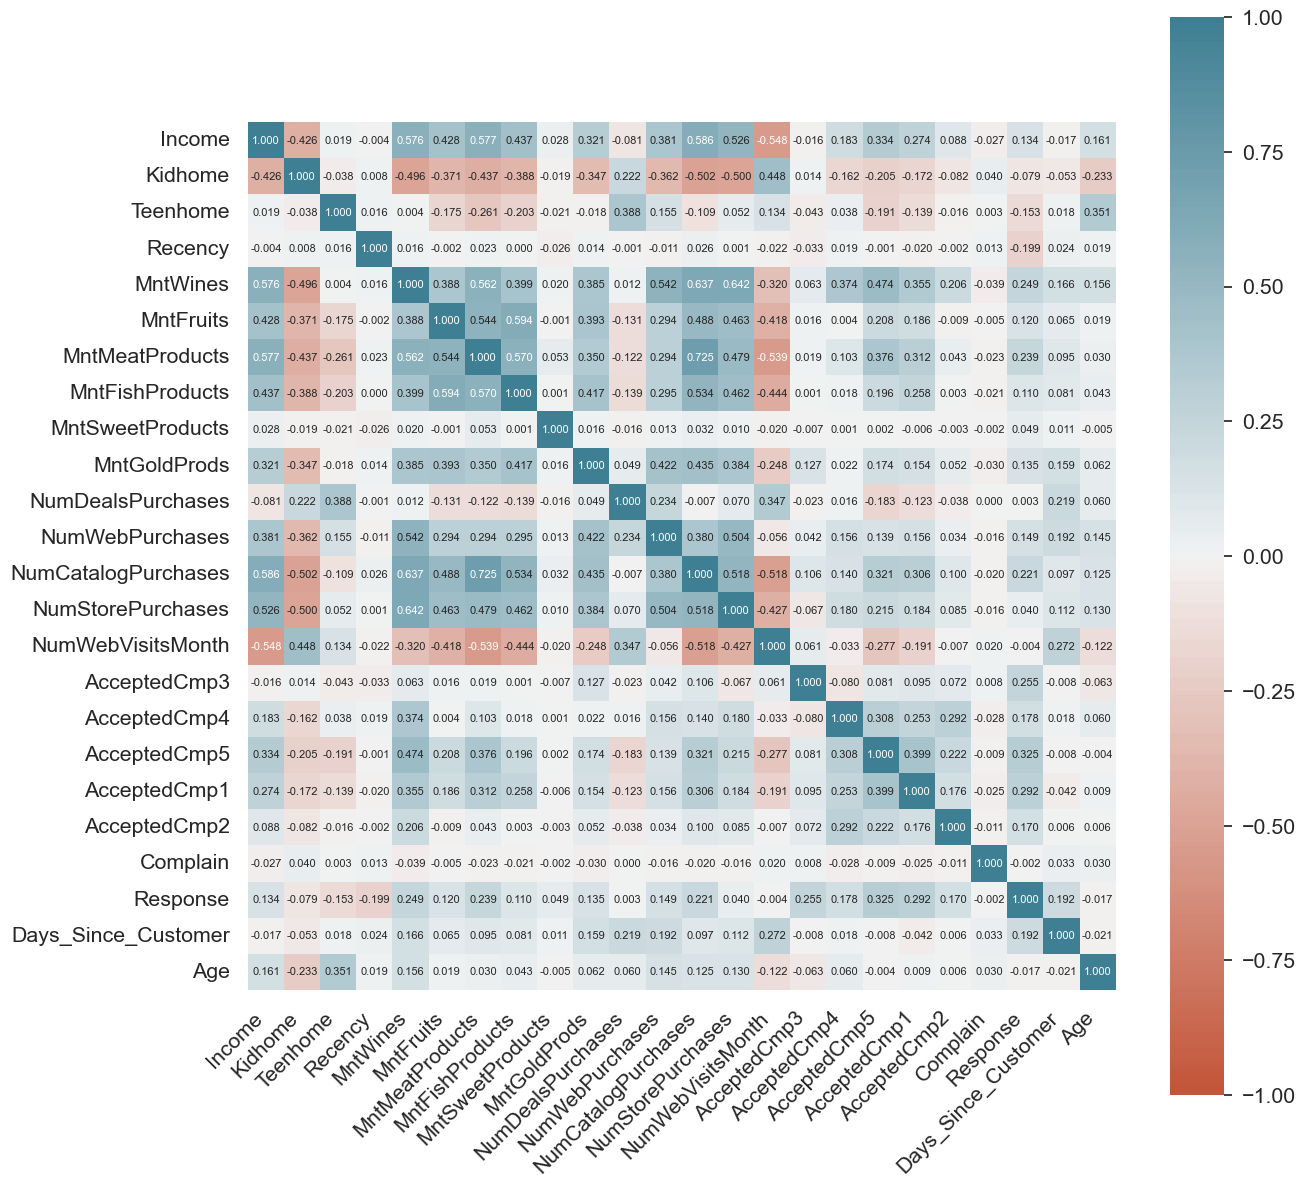

In [ ]:
corr = ds[numerical].corr()
plt.figure(figsize=(14, 14))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 8},
    fmt='.3f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The correlation heatmap analysis showed that, overall, there aren't strong correlations between the variables. The highest observed correlation was between `MntMeatProducts` and `NumCatalogPurchases`, with a coefficient of approximately 0.725. While this represents a moderate to strong positive correlation, it doesn't suggest multicollinearity, which typically becomes a concern when correlation coefficients exceed 0.8 or 0.9. 

Then, to analyze the relationship between customer `Age` and `Response` to the last campaign, we created a bar chart segmented by age group and response type (yes/no).

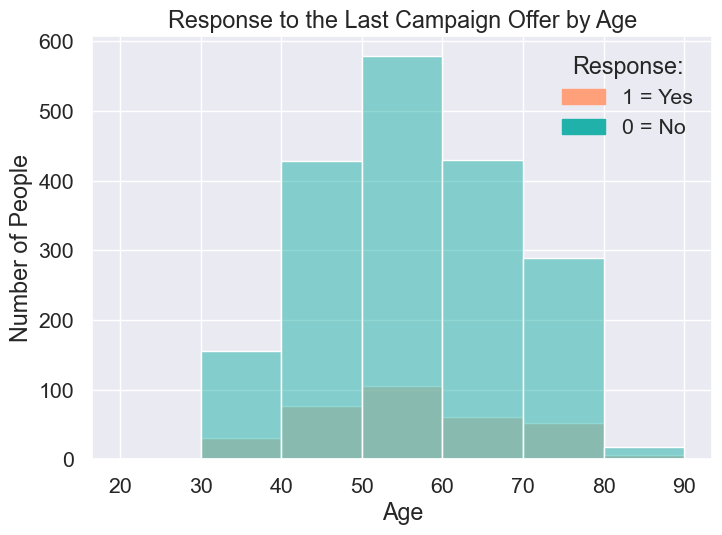

In [ ]:
palette = {1: "#FFA07A", 0: "#20B2AA"}

sns.histplot(
    data=ds,
    x="Age",
    hue="Response",
    bins = np.arange(20, 100, 10),
    palette=palette
)

plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Response to the Last Campaign Offer by Age")

yes_patch = mpatches.Patch(color=palette[1], label='1 = Yes')
no_patch = mpatches.Patch(color=palette[0], label='0 = No')
plt.legend(handles=[yes_patch, no_patch], title="Response:")

plt.show()

The chart above illustrates the distribution of responses to the last marketing campaign based on customer age. The responses are divided into two groups: those who accepted the offer (1 = Yes) and those who didn't (0 = No).

It can be observed that most of our customers are between 40 and 70 years old. The age group between 50 and 60 had the highest number of positive responses to the last campaign. This information may be relevant for future campaign segmentation, allowing for a more efficient targeting of the audience with a higher likelihood of conversion.

Next, we look at the impact that people's age and income have on responses to the latest campaign.

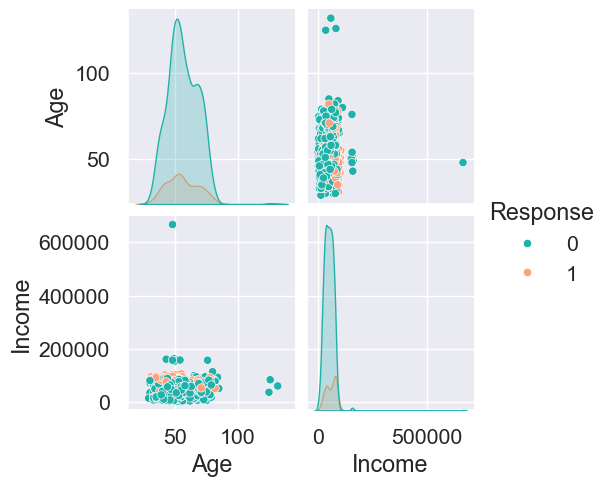

In [ ]:
sns.pairplot(data=ds, hue='Response', vars=['Age', 'Income'], palette=palette)
plt.show()

From these plots, we can see that people who are middle-aged and have moderate income levels are more likely to engage and respond to marketing campaigns. On the other hand, extremely young, older, or high-income individuals show lower engagement. This suggests that marketing efforts may be more effective when targeted at middle-aged consumers with average income levels.

We also noticed the presence of some unusual values, for example, people with ages above 100 or extremely high income levels. These outliers don’t reflect the typical customer profile and were treated and cleaned later in our preprocessing steps to ensure the model’s accuracy and avoid distortion in the results.

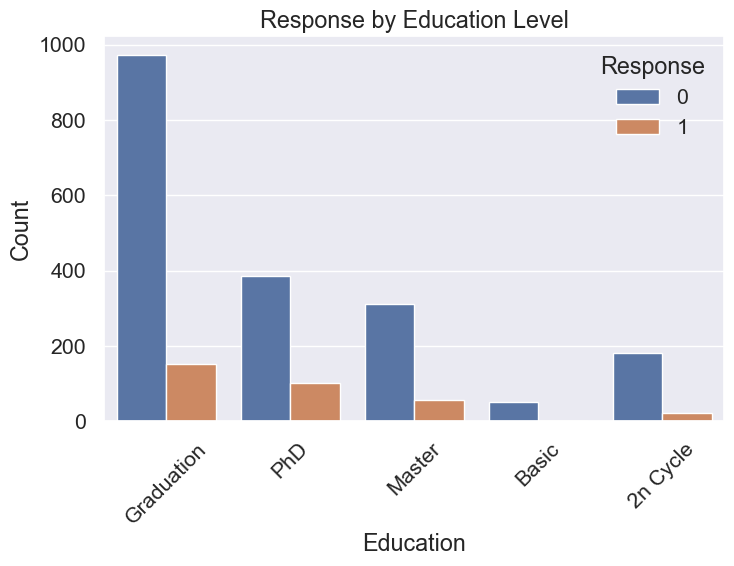

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=ds, x='Education', hue='Response')
plt.title('Response by Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This chart compares education levels with campaign response rates. It highlights that customers with higher education levels, particularly those with a Graduation or PhD degree, responded more frequently to the campaign. This suggests education could be a relevant factor in predicting responsiveness and could be used to tailor messaging or targeting.

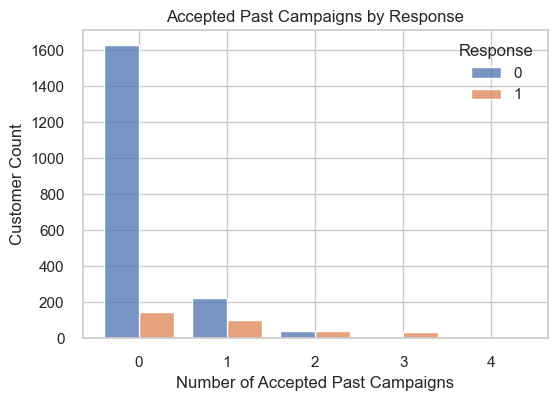

In [ ]:
accepted_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
ds['TotalAccepted'] = ds[accepted_cols].sum(axis=1)
ds['TotalSpend'] = ds[spend_cols].sum(axis=1)

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.histplot(data=ds, x='TotalAccepted', hue='Response', multiple='dodge', discrete=True, shrink=0.8)
plt.title("Accepted Past Campaigns by Response")
plt.xlabel("Number of Accepted Past Campaigns")
plt.ylabel("Customer Count")
plt.show()

When we look at this graph, we can tell that customers who had accepted previous campaigns (non-zero past acceptances) are much more likely to respond again. This helps us understand that using past behavior as a predictor of future behavior, is a good idea for response modeling.

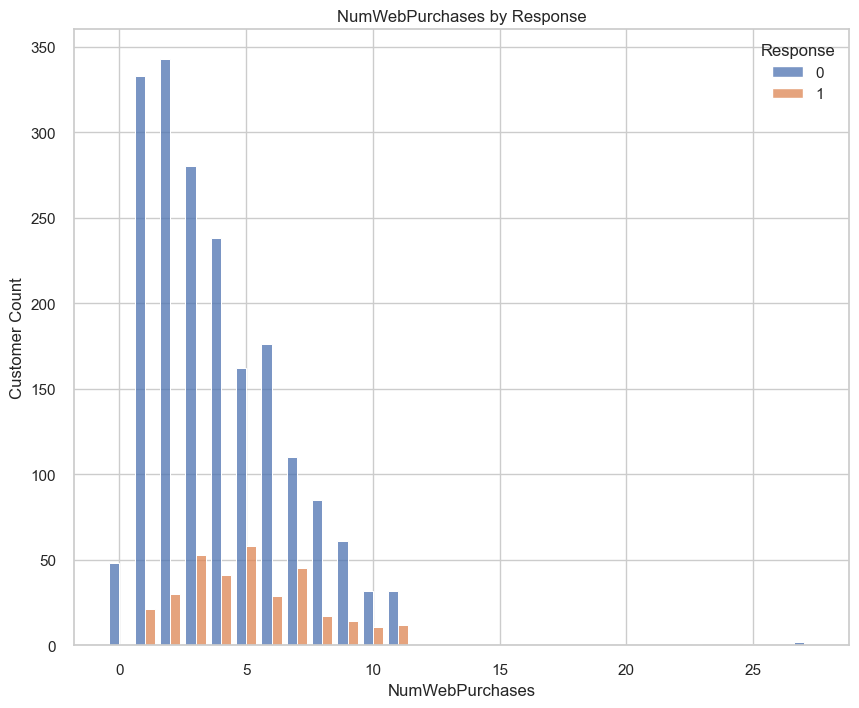

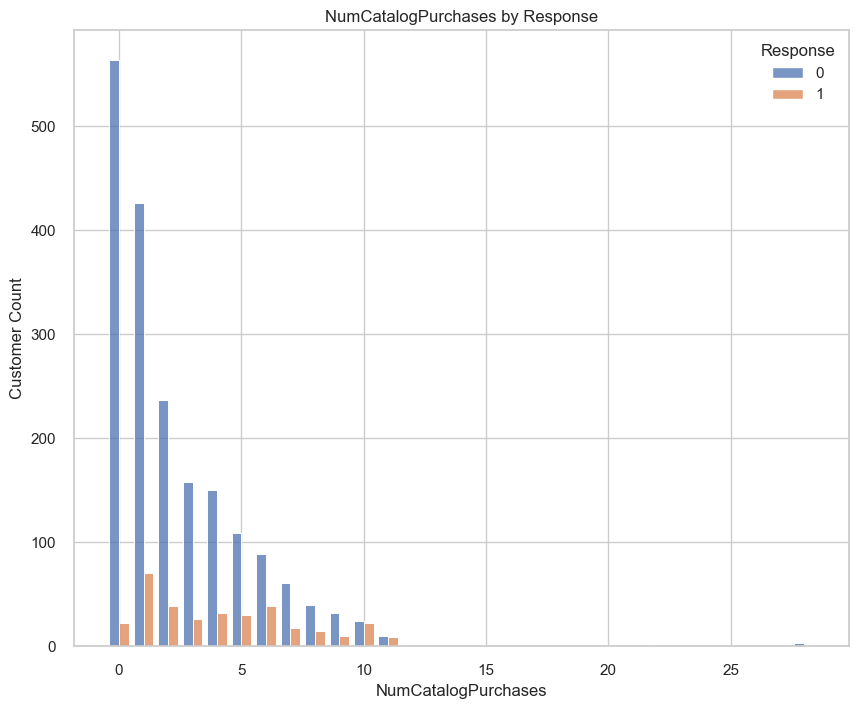

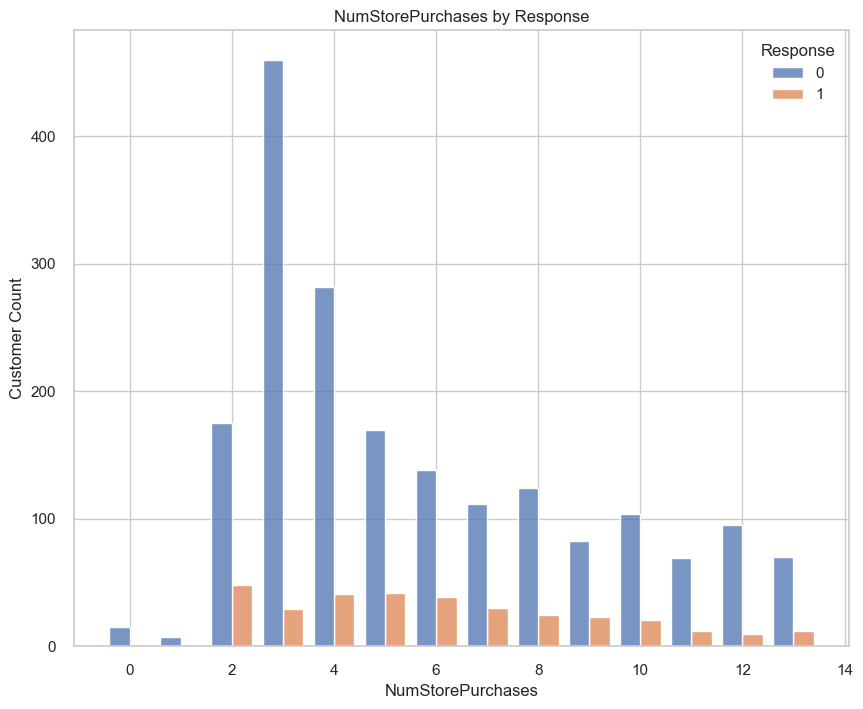

In [ ]:
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
for col in purchase_channels:
    plt.figure(figsize=(10,8))
    sns.histplot(data=ds, x=col, hue='Response', multiple='dodge', discrete=True, shrink=0.8)
    plt.title(f"{col} by Response")
    plt.xlabel(col)
    plt.ylabel("Customer Count")
    plt.show()

When we look at the number of purchases by channel: web, catalog, and store, we start to see how different shopping habits might relate to how likely someone is to respond to a marketing campaign.

For web purchases, the graph shows a small trend: people who responded to the campaign tend to have made more online purchases. This suggests that customers who are more active online might also be more likely to engage with digital campaigns.

Looking at catalog purchases, the difference is a bit more noticeable. Customers who responded often have a higher number of catalog orders, which may indicate that people who are used to catalog shopping are more responsive to marketing in general, possibly because they’re already used to reading and reacting to offers.

As for store purchases, the data is more spread out. We can see responders across almost every level, which makes it harder to define a clear pattern. This could mean that store shoppers are a more diverse group, or that store loyalty doesn’t always translate directly into campaign responsiveness, but some of them may still be worth targeting.

## Data preparation

In [ ]:
X = ds.copy(deep=True)

### Outliers
After analysing the boxplots from numerical features, we decided to only treat outliers from below to prevent our model to be negatively impacted. The other ones, we consider that are possible values and we do not intend to lose very valuable (purchasing power) customer information.

In [ ]:
X.drop(X[X.Age > 100].index, inplace=True)


Reason to treat `Age`: It's very unlikely to a person to be more than 100 years old and to purchase from this store.

In [ ]:
X.drop(X[X.Income > 500000].index, inplace=True)

Reason to treat `Income`:  Only one outlier was found, and the customer associated with it bought very few products.

In [ ]:
X.drop(X[X.MntMeatProducts > 1500].index, inplace=True)

Reason to treat `MntMeatProducts`: Some customers showed unusually high spending on meat, which didn’t match their `Income`. 

In [ ]:
X.drop(X[X.MntSweetProducts > 300].index, inplace=True)

Reason to treat `MntSweetProducts`: These outliers had very large and oddly repetitive values that stood out from the rest of the data.

In [ ]:
X.drop(X[X.MntFishProducts < 0].index, inplace=True)

Reason to treat `MntFishProducts`: Two customers had negative amounts spent on fish.

Convertion into dummy variables:


Since the models used only accept numerical inputs, categorical variables needed to be transformed into dummy variables (one-hot encoding). These dummy variables are binary, indicating the presence (1) or absence (0) of a given category. For instance, the variable Education was encoded into separate binary variables such as `Education_Basic`, which takes the value 1 if that category was originally selected, and 0 otherwise. This approach follows the considerations presented in the lecture slides:

"When creating dummy variables for categorical columns, create a column for category level minus one (if there are 8 levels create only 7 dummy variables), this will avoid multicollinearity" (slide 43, 5-Classification)

Convert `Marital_Status` and `Education` to numerical variables:

In [ ]:
def one_hot(s, prefix):
    d = pd.get_dummies(s, prefix=prefix, drop_first=True)  
    return d.astype(int)

cols = ['Marital_Status', 'Education']
for col in cols:
    colToProcess = X[col].astype(str)
    procDF = one_hot(colToProcess, col)
    X = pd.concat([X, procDF], axis=1)

The columns `Kidhome` and `Teenhome` represent categorical levels of the number of children, such as 'no kids', 'a few kids' and 'many kids'.

In [ ]:
cols = ['Kidhome', 'Teenhome']
X = pd.get_dummies(data=X,columns=cols,drop_first=True)

In [ ]:
X.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2222.0,2222.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,2222,5,Graduation,1118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2222,5,Married,857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2222.0,NaN,NaN,NaN,51795.226148,21029.812042,1730.0,35422.25,51381.5,68118.0,162397.0
Recency,2222.0,NaN,NaN,NaN,49.167417,28.958336,0.0,24.0,50.0,74.0,99.0
MntWines,2222.0,NaN,NaN,NaN,303.918542,336.290389,0.0,24.0,174.0,504.0,1493.0
MntFruits,2222.0,NaN,NaN,NaN,26.165167,39.643063,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2222.0,NaN,NaN,NaN,163.153465,214.49442,0.0,16.0,66.0,227.75,984.0
MntFishProducts,2222.0,NaN,NaN,NaN,37.458596,54.47751,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2222.0,NaN,NaN,NaN,27.010351,41.183203,0.0,1.0,8.0,33.0,263.0


In [ ]:
X2 = X.copy(deep=True)
#explained later on this notebook

## Modeling - KNN

Our goal is to find which customers are likely to respond to a marketing campaing based on information from a previous campaign. Therefore, in this dataset we need to predict the collumn `Response`, our target.

In [ ]:
y = X['Response']

The following columns were removed after being transformed into dummy variables. We also dropped the `ID` column, as it doesn't provide any predictive value for the model.

In [ ]:
cols = ['ID', 'Education', 'Marital_Status'] 
X.drop(columns=cols, inplace=True)

The dataset was split into training and test sets, using a 75-25 ratio.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

The target was removed from the training and the test sets, as it is the class we aim to predict.

In [ ]:
X_train = X_train.drop(['Response'],axis=1)
X_test = X_test.drop(['Response'],axis=1)

Apply StandardScaler to normalize the data:

In [ ]:
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

To check if the responses were balanced, meaning there are almost the same amount of people answering 'yes' to the campaign (Response=1) and 'no' (Response=0). We did the following:

Counter({0: 1419, 1: 247})


<Axes: xlabel='Response', ylabel='count'>

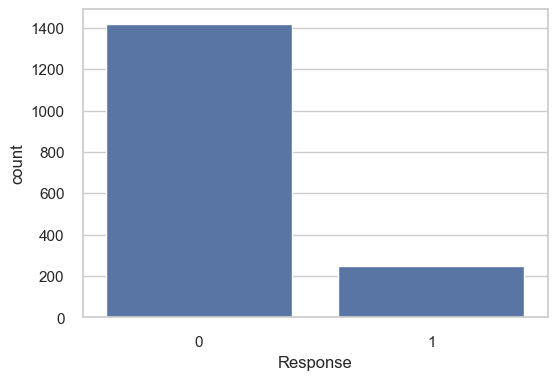

In [ ]:
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)

The analysis of the target variable in the training set reveals a strong class imbalance, with 1420 answers with 0 and only 249 answers with 1. This imbalance can negatively affect model performance by biasing predictions toward the majority class.

To address the class imbalance identified in the training set, we created new instances (oversampling).

Counter({0: 1419, 1: 1419})


C:\Users\Laura.LAPTOP-IJA5A916\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


<Axes: xlabel='Response', ylabel='count'>

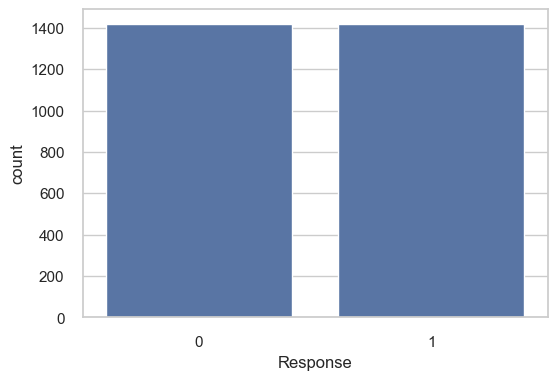

In [ ]:
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train2}), ax=ax)

As a result, the new training set (y_train2) now contains 1420 samples in each class. This balancing is essential to improve the model’s ability to correctly identify instances of the minority class and to prevent prediction bias.

Create object and train the model:

In [ ]:
classModel = KNeighborsClassifier(n_neighbors=15)
classModel.fit(X_train_scaled2, y_train2)

KNeighborsClassifier(n_neighbors=15)

After testing multiple values ​​of K, we chose the value K = 15 because it presents the best balance between performance and generalization, smallest difference between training and testing, indicating less underfitting and overfitting.

# Evaluation - KNN

KNN is a simple and effective algorithm, ideal for predicting which customers are most likely to respond to a marketing campaign, based on data from previous campaigns. It compares a new customer with the K most similar customers and makes a decision based on the behavior of those neighbors.

Since it requires no training and handles non-linear patterns well, KNN is particularly useful in this project, where response behavior can vary across different customer profiles. Additionally, it's interpretability makes it easier to understand the results and support informed decision-making.

Although it can be slower with large datasets, with well-prepared and normalized data, KNN can be an efficient solution to improve campaign performance by providing straightforward and reliable response predictions.

We use the KNN model to predict responses on the training and test data:

In [ ]:
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

We then calculate key performance metrics for the training and testing sets, and it returns them in a single DataFrame for easy comparison:

In [ ]:
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

Function to plot confusion matrix:

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))

        if len(cf)==2:
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

Show the confusion matrix:

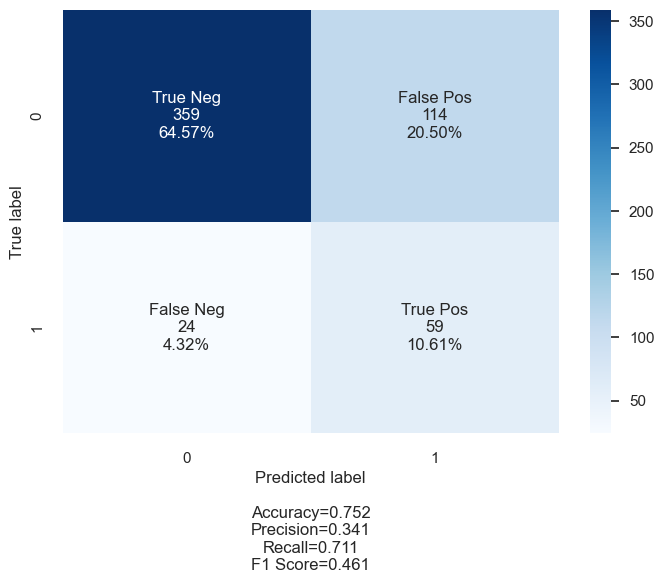

In [ ]:
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

The results indicate that the model is effective at identifying customers who are unlikely to respond to the campaign (64.6% of the cases), which is useful for avoiding unnecessary contacts. However, it presents a relatively high false positive rate, customers who were predicted to respond but didn't, which is reflected in the low precision (34.1%).

Despite this, the model demonstrates a good ability to detect customers who actually do respond to the campaign, with a recall of 71.1%. This metric is particularly relevant in a marketing context, where it is often preferable to reach as many potential respondents as possible, even at the risk of some false positives.

However, in campaigns with a higher cost per contact, this model may lead to increased expenses by targeting many customers who are unlikely to respond.

Show performance results:

In [ ]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.870331,0.751799
1,PRECISION,0.810029,0.341040
2,RECALL,0.967583,0.710843
3,F1 SCORE,0.881824,0.460938
4,AUC,0.870331,0.734914


The results show a significant difference between the performance on the training and test sets, particularly in the precision, recall, and F1 score metrics. This suggests that the model may be overfitting the training data. Despite these limitations, the AUC of 0.735 on the test set indicates that the model has a reasonable ability to distinguish between customers who are likely to respond to the marketing campaign and those who are not, making it a useful decision-support tool for the marketing department.

ROC curve:

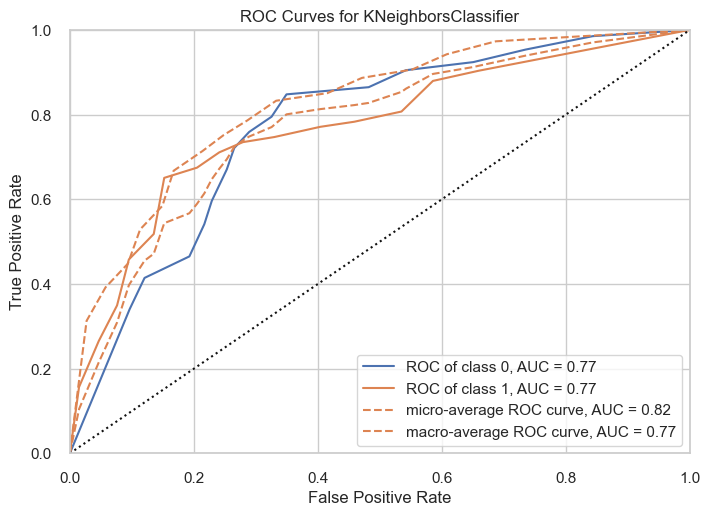

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

An AUC of 0.77 indicates that the model, based on historical campaign data, is reasonably accurate at predicting which customers are more likely to respond to future campaigns. The micro-average AUC of 0.82 further reinforces this positive conclusion.

Precison-Recall curve:

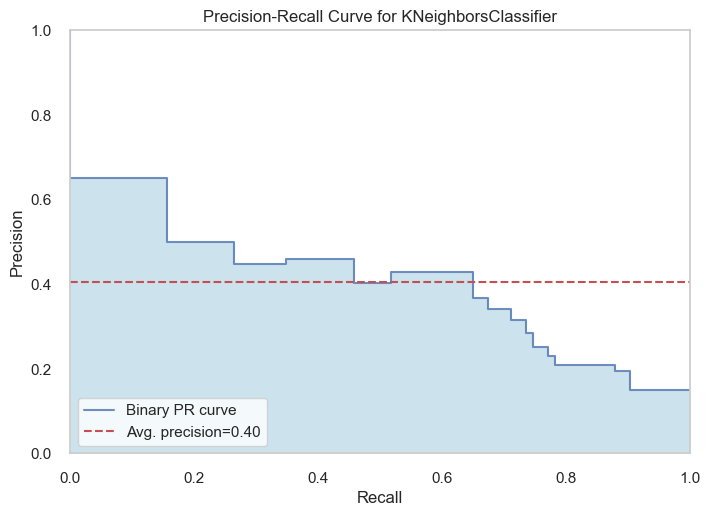

<Axes: title={'center': 'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

The Precision-Recall curve shows an average precision of 0.40, meaning that only 40% of the customers identified as likely to respond actually do so. Although the model has some ability to identify customers who will respond (reasonable recall), it also generates many false positives, which can lead to wasted resources on poorly targeted campaigns.


## Modeling - SVM

As the SVM model, like KNN, is sensitive to feature scaling, we used the same standardized dataset prepared previously. Therefore, the same treatment applied for KNN (including imputation, scaling, and SMOTE) is reused here, and we begin this section directly from the model creation step.

Create object and train model:

In [ ]:
classModel = svm.SVC(gamma='scale', random_state=123, probability=True)
classModel.fit(X_train_scaled2, y_train2)

SVC(probability=True, random_state=123)

## Evaluation SVM

Support Vector Machines (SVMs) are supervised learning algorithms used mainly for classification problems. The goal of an SVM is to find the best possible boundary (called a hyperplane) that separates data points from different classes.

What makes SVM unique is that it doesn't just find *a* separating line, it finds the one that maximizes the margin between the classes. The data points that are closest to the boundary (and most difficult to classify) are called support vectors, and they are the ones that the model uses to define this margin.

SVMs can handle both linear and non-linear problems. When the data isn’t linearly separable, SVM uses a technique called the **kernel trick**, which transforms the data into a higher-dimensional space where it becomes easier to separate with a straight line (or plane). Common kernel types include linear, polynomial, and RBF (radial basis function).

In our case, we used SVM to classify customers based on whether they are likely to respond to a marketing campaign or not. This makes SVM a helpful tool in identifying potential responders with high accuracy, especially when the classes are not clearly separated.

We use the trained SVM model to predict the target values on both the training set and the original test set:

In [ ]:
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

We then calculate key performance metrics for the training and testing sets, and it returns them in a single DataFrame for easy comparison:

In [ ]:
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

We plot the confusion matrix for the test predictions to visualize true positives, true negatives, false positives, and false negatives.
Function to plot confusion matrix:

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    

# Generate text inside each square
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


# Code to generate summary statistics & Text for summary stats 
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


# Set figure parameters according to other arguments
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


# Make the heatmap visualization
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

Show the confusion matrix:

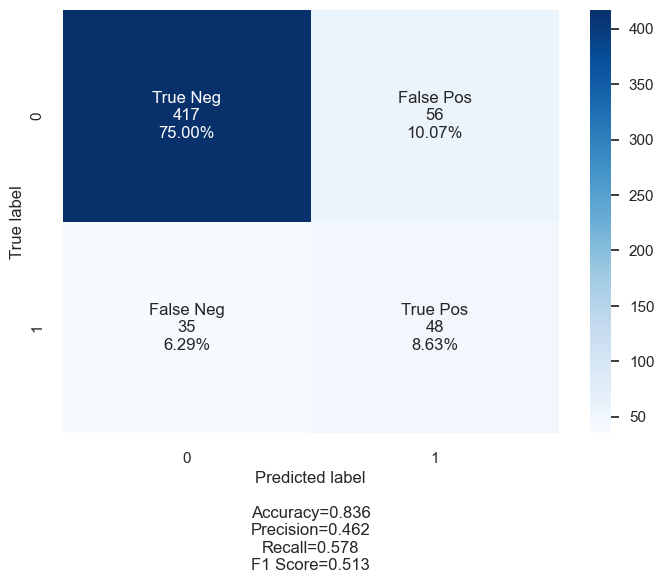

In [ ]:
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Show performance results:

In [ ]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.942213,0.836331
1,PRECISION,0.932460,0.461538
2,RECALL,0.953488,0.578313
3,F1 SCORE,0.942857,0.513369
4,AUC,0.942213,0.729960


From the confusion matrix, we can see that the SVM model correctly predicted 48 true responders and 417 true non-responders. However, it also produced 56 false positives—people who were wrongly predicted to respond—and missed 35 actual responders (false negatives).

This explains the relatively low precision score of 0.462 on the test set: a significant part of the predicted responders were actually non-responders. On the other hand, the model achieved a recall of 0.651, meaning it was able to identify over half of the actual responders.

The overall accuracy of 0.836 is fairly strong, but the F1 score of 0.578 reveals a trade-off between precision and recall. This shows that if we rely on accuracy alone can be misleading, specially in marketing scenarios, where false positives may lead to wasted campaign resources. 

We use Yellowbrick visualizers to plot the ROC AUC and Precision-Recall curves for the SVM model, helping us assess the trade-off between sensitivity and specificity. ROC curve:

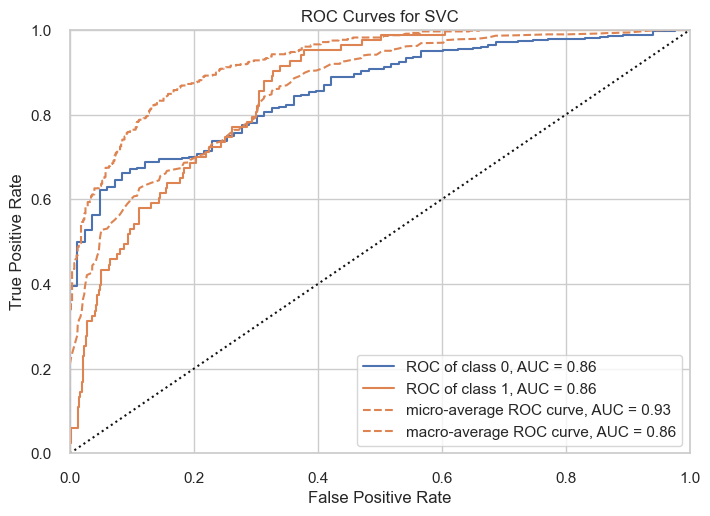

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train2) 
imputer.fit(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)  
visualizer.score(X_test_scaled_imputed, y_test)
visualizer.show()

The ROC curve shows that the model performs well in distinguishing between responders and non-responders. The AUC for both classes is 0.86, and the micro-average AUC reaches 0.93, which indicates that the model is very effective at ranking predictions correctly across all classes.

Despite the relatively low precision seen earlier, this ROC curve reassures us that the SVM model is capturing meaningful patterns in the data. The ROC curve evaluates the model's performance independently of any threshold, which is particularly useful when the focus is on the model's ability to discriminate between classes.

This visualization gives us greater confidence in the model’s predictive potential. It also suggests that by adjusting classification thresholds or combining the SVM with other techniques, we may increase its real-world business, especially in reducing false positives.

The Precision-Recall (PR) curve is particularly useful when dealing with imbalanced datasets. It shows the trade-off between precision (positive predictive value) and recall (sensitivity) for different thresholds. This helps evaluate how well the SVM model is identifying positive responses (class 1) versus incorrectly classifying them. Precison-Recall curve:

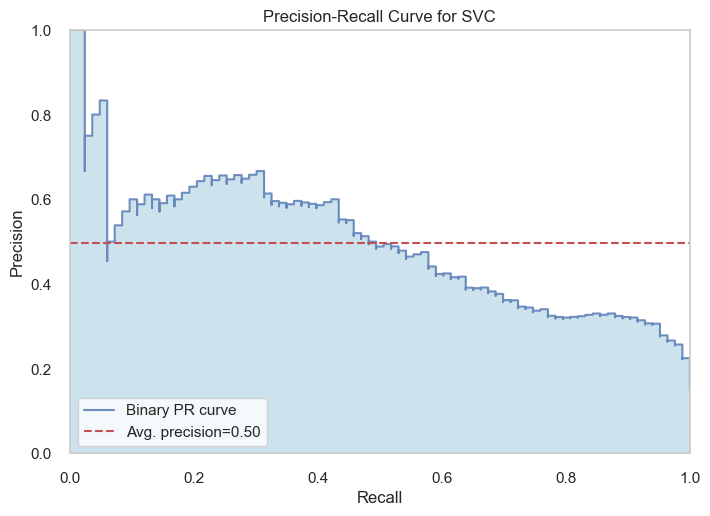

<Axes: title={'center': 'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
X_test_scaled_imputed = imputer.transform(X_test_scaled)
visualizer.score(X_test_scaled_imputed, y_test)
visualizer.show()

The Precision-Recall curve illustrates how precision varies as recall increases. In this case, the average precision is 0.5, meaning that half of the instances predicted as responders are actually correct on average.

We observe that precision starts relatively high at lower recall levels, but drops significantly as the model tries to identify more true responders. This tells us that the model is more trustworthy when it’s selective, but becomes less precise when casting a wider net, leading to more false positives.

From a business perspective, this highlights an important outcome, which is that if our goal is to reach as many true responders as possible, we will also include a large number of non-responders, which may increase marketing costs. On the other hand, if we only target the highest-confidence predictions, we risk missing potential customers but reduce wasted effort. This insight helps us strategically choose thresholds based on campaign priorities, whether to focus on efficiency or reach.

## Modeling - Decision Trees

A decision tree for classification is a model that splits data based on feature values, in this case eg: `Income`, to predict class labels, 0 or 1. Each internal node represents a decision, and leaves show the final classification. It’s easy to interpret and useful for making predictions based on learned rules.

Since we do not need to standardize the dataset for Decision Trees, we created a copy of the X (training and test data) to not apply this treatment. Besides that, the X2 it's treated the same as X. The same logic is applied until Evaluation - DT.

In [ ]:
y = X2['Response']

In [ ]:
cols = ['ID', 'Education', 'Marital_Status'] 
X2.drop(columns=cols, inplace=True)

In [ ]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, stratify=y, random_state=123)

In [ ]:
X2_train = X2_train.drop(['Response'],axis=1)
X2_test = X2_test.drop(['Response'],axis=1)

Counter({0: 1419, 1: 247})
Response
0    0.851741
1    0.148259
Name: proportion, dtype: float64


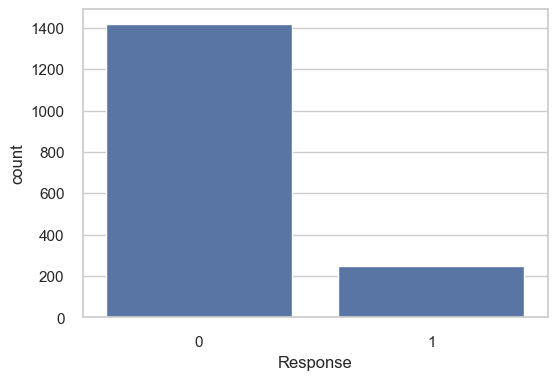

In [ ]:
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)
print(y_train.value_counts(normalize=True))

Counter({0: 1419, 1: 1419})


C:\Users\Laura.LAPTOP-IJA5A916\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


<Axes: xlabel='Response', ylabel='count'>

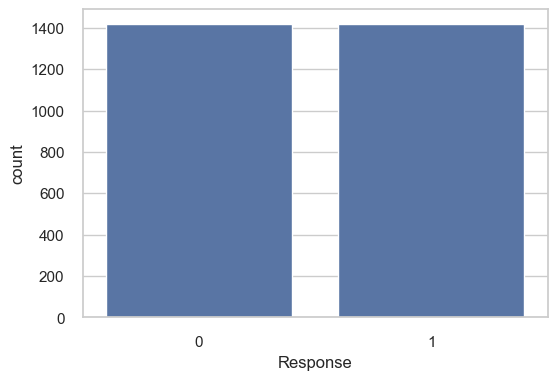

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123, sampling_strategy=1.0)
X2_train2, y_train2 = sm.fit_resample(X2_train, y_train)

print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train2}), ax=ax)

In [ ]:
from sklearn import tree
classModel = tree.DecisionTreeClassifier(max_depth=4, random_state=123)
classModel.fit(X2_train2.values, y_train2)

DecisionTreeClassifier(max_depth=4, random_state=123)

### Evaluation - DT

In [ ]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X2_train2.values) 
y_pred_test = classModel.predict(X2_test.values) 

Show Decision Tree:

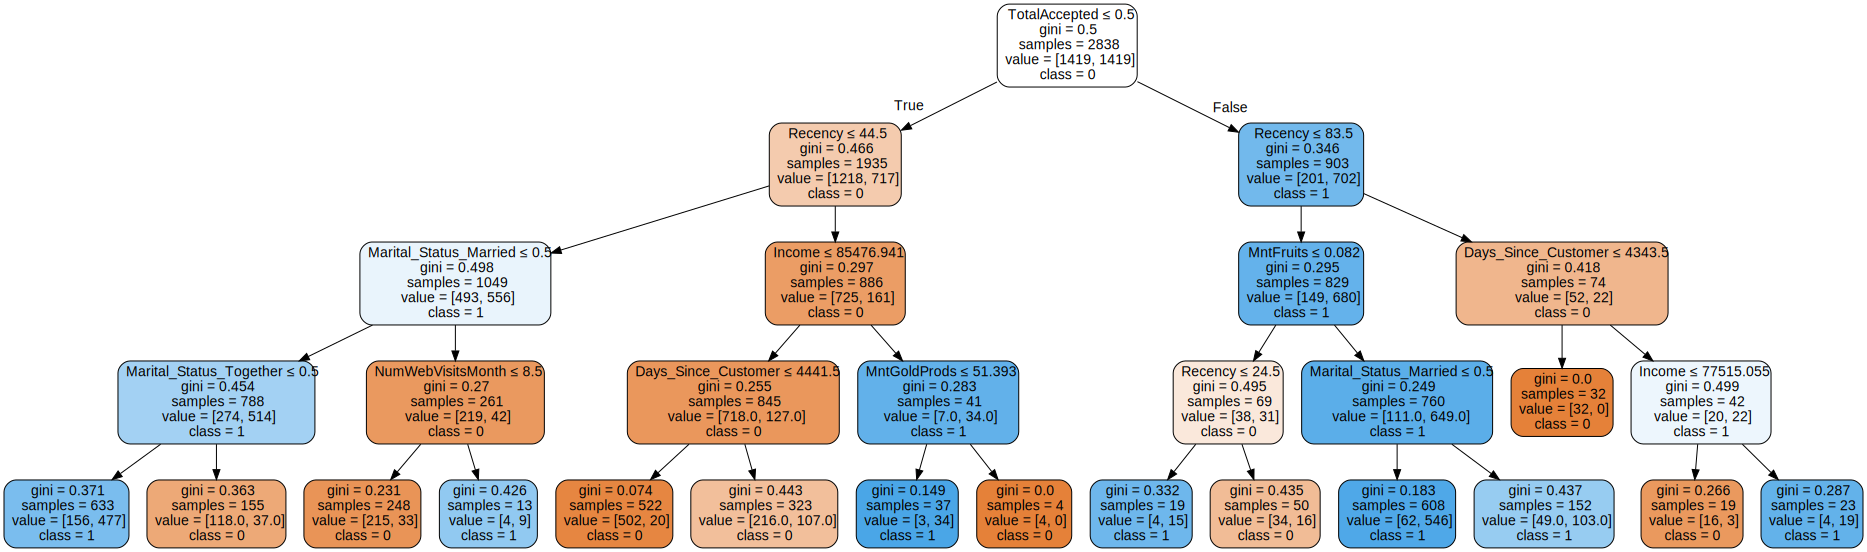

In [ ]:
import graphviz
dot_data = tree.export_graphviz(classModel, out_file=None, 
                      feature_names=list(X2_train2.columns),  
                      filled=True, rounded=True,  
                      special_characters=True,
                     class_names=[str(c) for c in classModel.classes_])  
graph = graphviz.Source(dot_data)  
graph 

This output is used for classification. It learns from your data to predict a binary outcome: class = 0 or class = 1. In our context, 0 represents customers who did not accept the campaign, whereas 1 who accepted.
Each node has five variables:
1. The Decision Rule: if it's true it goes to the true side node if it's false goes to the false side node.
2. Gini impurity: it measures how well the nodes splits the dataset. More pure close to 0, impure close to 0.5.
3. Samples: The number of samples on this node.
4. Value: The left side has the number of samples in class = 0 and the right side has the number of samples in class = 1.
5. Class: The value (0 or 1) predicted for this node.

The tree applies a series of if/else conditions at each node, then the customer 'goes through' the tree until reaching a leaf node, where the prediction of the class is made.

Look at the root node:
The decision rule is: if `TotalAccepted` is less or equal to 0.5. If our sample is less, it goes next to the orange node(true side), otherwise it goes to the blue node(false side). The gini index indicates that there is not a dominant class, but it classifies as 0. This node has 2838 samples and the values are spliting in half between classes.

For further analysis we checked more metrics.

Function to create dataframe with metrics:

In [ ]:

def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

Function to plot confusion matrix:

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

Show the confusion matrix:

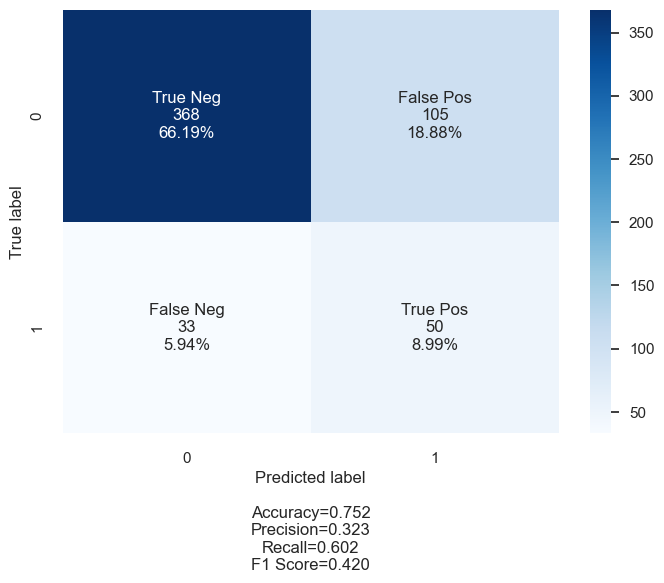

In [ ]:
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Show performance results:

In [ ]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.824524,0.751799
1,PRECISION,0.810101,0.322581
2,RECALL,0.847780,0.602410
3,F1 SCORE,0.828512,0.420168
4,AUC,0.824524,0.690211


ROC curve:

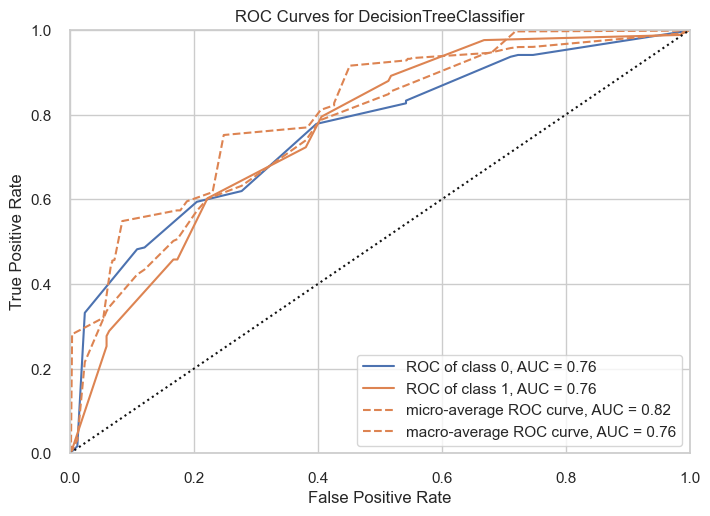

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X2_train2.values, y_train)
visualizer.score(X2_test.values, y_test)
visualizer.show()

We tested the algorithm using different train/test ratios and different tree depths. The results shown are from the best combination we found. We chose not to make the tree too deep so that the splits would be easier to understand. A depth of 4 gave us the best balance between good results and good visualization.
After analyzing the confusion matrix, performance metrics and ROC curves we took the following conclusions:
1. Confusion Matrix: 
DT model has shown that has a good prediction of True Negatives, clients that did not accept the campaign. However, the number of false positives, clients that did not accept the campaign but we predicted that they would, are around 20%, which can be too costly to this business.

2. Performance metrics:
Accuracy indicates that there is overfitting, performance on the trainning set is much higher than on test.
Precision is also too low on test set.
Although, Recall is acceptable (number of true positives), the F1 score is too low, there is not a balance between Precision and Recall.

3. ROC curves:
These curves evaluate the model's capacity to distinguish between classes, in our case between accept and not accept. The curve on class 1 is more irregular meaning that the model shows instability to distinguish the classes.

Due to overfitting and a high number of false positives, that are costly to the business, we will implement ensembling of methods, using Random Forest algorithm, that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting.

### Modeling - Random Forest

For this algorithm we can use the same modeling as DT, until the classModel.

In [ ]:
# Create object and train the model
from sklearn.ensemble import RandomForestClassifier
classModel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=123)
classModel.fit(X2_train2.values, y_train2)

RandomForestClassifier(max_depth=5, random_state=123)

We created the random forest with depth=5, (best result with minimum depth possible). We can jump to the evaluation part to check if it improved. Note: There's no visualization for this algorithm because it would generate multiple and complex trees.

### Evaluation - RD

In [ ]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X2_train2.values) 
y_pred_test = classModel.predict(X2_test.values) 

Function to create dataframe with metrics:

In [ ]:

def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

Function to plot confusion matrix:

In [ ]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

Show the confusion matrix:

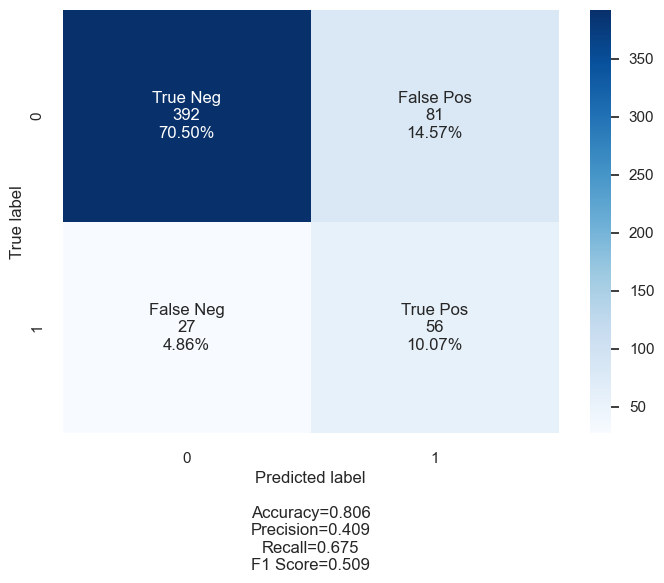

In [ ]:

cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Show performance results:

In [ ]:
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.905920,0.805755
1,PRECISION,0.891837,0.408759
2,RECALL,0.923890,0.674699
3,F1 SCORE,0.907580,0.509091
4,AUC,0.905920,0.751726


ROC curve:

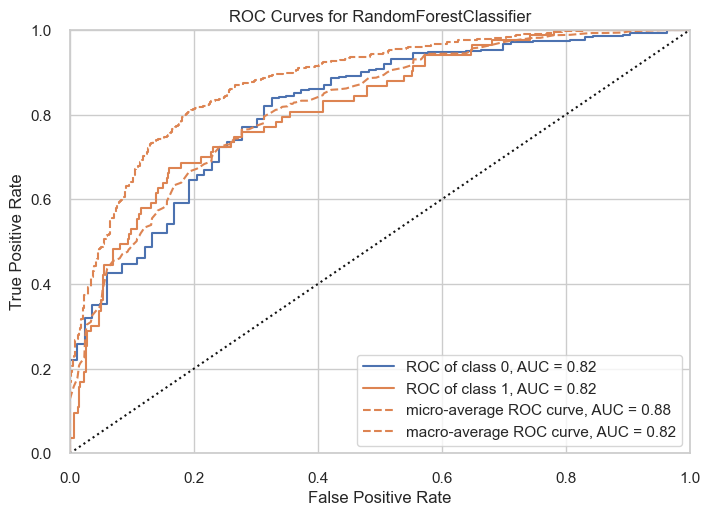

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X2_train2.values, y_train)
visualizer.score(X2_test.values, y_test)
visualizer.show()

After analyzing the confusion matrix, performance metrics and ROC curves and comparing with the decision tree model, RF performed significantly better. 

Strengths:
* RD does not overfit with accuracy at 80%
* AUC curve it's better. It can distinguish between classes well.

Weaknesses:
* Precision is around 40% on test set, it needs improvement, could be costly since the business could be spending money on false positives.
* F1 Score, it improved but not enough.

Show feature importance:

In [ ]:
# Get feature importance
importance = list(classModel.feature_importances_)
# Create tuples with variable and value
X2 = X2.drop(['Response'], axis=1) #the drop was made directly on the X2 dataframe. It was already made on training and test sets
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(list(X2.columns), importance)]
# Sort in descend order
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)
resultsDF = pd.DataFrame(data=feature_importance, columns=['Feature', 'Importance'])
resultsDF

,Feature,Importance
0,Recency,0.11
1,TotalAccepted,0.10
2,Marital_Status_Married,0.10
3,MntGoldProds,0.09
4,TotalSpend,0.08
5,MntWines,0.06
6,Income,0.05
7,MntMeatProducts,0.05
8,Days_Since_Customer,0.05
9,Marital_Status_Together,0.05


This table shows the importance of each feature. Our predictons made on data understanding turned out to be right. Even though, we did not predict the the most important feature `Recency`, the features `TotalAccepted`, `Income`, `education_Graduation`, `NumCatalogPurchases` and `Age` still have a significant weight to this algorithm, a meaning to our predictions.	

# Business Insights
We started this project with a clear business goal: helping your team identify which customers are most likely to respond to an upcoming marketing campaign. The aim is to support smarter, data-driven targeting, improving results while reducing unnecessary costs.

To do this, we tested different machine learning models. For each model, we:
* Applied the same training and test process.
* Used SMOTE to handle imbalanced response classes.
* Tuned each model and selected the best-performing version. 
In the end, we compared their performance based on accuracy, precision, recall, F1 score, and AUC. These metrics help us understand how reliable each model is in predicting actual responders and avoiding false positives.

Our recommendation? Use Support Vector Machine (SVM)
Out of all the models we tested, the Support Vector Machine (SVM) gave the most consistent results. It's the model we recommend moving forward.
Here’s why:
* It had the highest test accuracy (83.6%), meaning it got the most predictions correct,  overall.
* It also had the highest precision (46.2%), which is essential when you want to avoid sending offers to people who won’t respond.
* It led in F1 score (0.51), which shows a strong balance between identifying responders (recall) and doing so accurately (precision).
* Its AUC score (0.73) confirms that it performs well in ranking customers by likelihood to respond. Although it was not the best overall, it is a strong AUC. 
* The ROC and Precision-Recall curves show strong consistency across different thresholds, which gives your team flexibility depending on whether you want to focus more on reach or cost-efficiency.

Simply putting it,  the SVM model is the most reliable at finding likely responders without wasting budget on the wrong targets.

Why not other models? We also saw good results from Random Forest, especially in recall, which is useful when the priority is reaching as many responders as possible. But it didn’t perform as well in precision and F1 score, meaning it may lead to more false positives, people targeted who aren’t likely to respond. K-Nearest Neighbours and Decision Trees had lower overall performance. While they still provide insight, they don’t offer the same level of balance or reliability for your goal.

That being said, if your goal is to optimize results and reduce cost, the SVM model is the best fit. It helps you focus on people who are not just likely to respond, but really likely, so your budget is used more efficiently.

If the campaign objective changes in the future (for example, maximising total reach instead of ROI), the Random Forest model could be revisited. But for a balanced, reliable strategy, SVM is our recommendation.

Next steps and future improvements: 
To keep improving, we suggest:
* Including more customer data, such as online behavior or previous engagement.
* Updating the model regularly with new campaign results, to keep it accurate over time.
* Testing again with the other models to see if their results are better than SVM.

Our final note: 
Choosing the right model isn’t just about numbers, it’s about aligning the predictions with what your team actually needs. The SVM model gives you a solid balance of reach and precision, helping your campaigns become more targeted, cost-effective, and impactful.
We’re confident that with this model in place, your team will be in a stronger position to make decisions backed by real insight and get better results from every campaign.